[*********************100%%**********************]  1 of 1 completed
                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8143
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                       0.663
Time:                        17:59:43   Log-Likelihood:                          15151.
No. Observations:                4969   AIC:                                 -3.027e+04
Df Residuals:                    4954   BIC:                                 -3.017e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

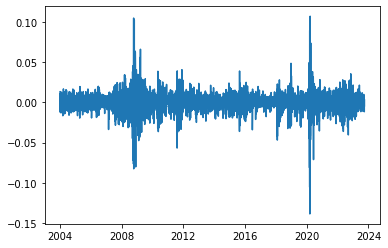

In [6]:
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbol for the DJIA (Dow Jones Industrial Average)
ticker_symbol = "^DJI"

# Set the start and end dates for the data you want to retrieve
start_date = "2004-01-01"
end_date = "2023-09-30"

# Fetch the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create dummy variables for days of the week and months
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

day_dummies = pd.get_dummies(data['day_of_week'], prefix='day')
month_dummies = pd.get_dummies(data['month'], prefix='month')
day_dummies = day_dummies.iloc[:,:-1]
month_dummies = month_dummies.iloc[:,:-1]

# Calculate the first difference of the logarithm of the 'Close' column
y = np.log(data['Close']).diff()
date = y.index[1:]

# Combine the data with dummy variables
x= pd.concat([day_dummies, month_dummies], axis=1)
x1 = x.iloc[1:,:]

common_index = x1.index.intersection(y.index)
x1 = x1.loc[common_index]
y = y.loc[common_index]

# Now, x1 and y should have the same aligned indices
model = sm.OLS(y, x1).fit()
print(model.summary())
yhat = model.predict(x1)
y1 = y - yhat
plt.plot(date,y1)
